In [1]:
import csv
import json
import pandas as pd

In [2]:

def read_data(path):
    tsv_file = open(path)
    read_tsv = csv.reader(tsv_file, delimiter="\t")

    X = []
    Y = []
    i = 0
    print('Reading articles...')
    for row in read_tsv:
        #print(row)
        # Opening JSON file
        if(row[0][:]!='ID'):

            #if(i%1000==0):
            #    print('Reading article ', i)

            json_file = open('data/jsons/'+row[0][:]+'.json',)
            #print(row[1][:])
            # Reading JSON file
            data = json.load(json_file)

            Y.append(data['bias'])
            X.append(data['content'])


            #print(target)
            #print(text)

            # Closing file
            json_file.close()
            i = i + 1

    tsv_file.close()
    print('done')
    
    return X, Y


In [3]:
print('Load training dataset')
train_data_path = "data/splits/media/train.tsv"
X_train, Y_train = read_data(train_data_path)

# dictionary of lists 
dict_train = {'content': X_train, 'bias': Y_train} 
df_train = pd.DataFrame(dict_train)
#df_train.to_csv('data/splits/media/train_data.tsv', index=False)

print('Load validation dataset')
val_data_path = "data/splits/media/valid.tsv"
X_val, Y_val = read_data(val_data_path)

# dictionary of lists 
dict_val = {'content': X_val, 'bias': Y_val} 
df_val = pd.DataFrame(dict_val)
#df_val.to_csv('data/splits/media/val_data.tsv', index=False)

print('Load test dataset')
test_data_path = "data/splits/media/test.tsv"
X_test, Y_test = read_data(test_data_path)

# dictionary of lists 
dict_test = {'content': X_test, 'bias': Y_test} 
df_test = pd.DataFrame(dict_test)

#df_test.to_csv('data/splits/media/test_data.tsv', index=False)


Load training dataset
Reading articles...
done
Load validation dataset
Reading articles...
done
Load test dataset
Reading articles...
done


In [4]:
print(df_test['content'][29])

On the morning of Aug. 30 , 2019 , as Hurricane Dorian was bearing down on Florida 's Treasure Coast , Jamie Seiler was at the hospital where she worked , preparing for the storm 's approach . Then her cellphone rang .
On the other end was the principal of her son 's school . The principal said her son had been escorted out of the school in handcuffs and was being taken to a psychiatric hospital in a police car .
Getting such a call is a nightmare for any parent , but Seiler 's son had n't threatened to shoot up the school or commit suicide . He had several developmental disorders and had thrown a tantrum . He was just 9 years old .
`` I flipped out , I broke down , '' Seiler says . She sat in her boss 's office , `` hysterical to the point they did n't think that I would be able to drive . ''
A professional therapist would later tell Seiler that a school resource officer ( SRO ) had tackled her autistic 80-pound son while he was sitting on a bench—a use of force that the therapist , w

In [5]:
#print(Y_train)

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# load the pre-trained BERT Tokenizer and Sequence Classifier as well as InputExample and InputFeatures

from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=4)

#BERT uses a WordPiece Tokenizer 
#WordPiece is the subword tokenization algorithm used for BERT, DistilBERT, and Electra. 
#//(source : https://huggingface.co/transformers/tokenizer_summary.html#wordpiece)

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [8]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  109482240 
_________________________________________________________________
dropout_37 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  3076      
Total params: 109,485,316
Trainable params: 109,485,316
Non-trainable params: 0
_________________________________________________________________


In [9]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
train  = df_train[['content', 'bias']] 
train.columns = ['DATA_COLUMN', 'LABEL_COLUMN']

val = df_val[['content', 'bias']] 
val.columns = ['DATA_COLUMN', 'LABEL_COLUMN']

test = df_test[['content', 'bias']]
test.columns = ['DATA_COLUMN', 'LABEL_COLUMN']

In [11]:
train.head()

,DATA_COLUMN,LABEL_COLUMN
0,President Trump and Senate Minority Leader Chu...,2
1,“ The 360 ” shows you diverse perspectives on ...,1
2,LOS ANGELES — Actress Rosario Dawson took the ...,0
3,President Donald Trump said on Friday that he ...,1
4,Washington ( CNN ) Donald Trump became the 45t...,0


In [12]:
val.head()

,DATA_COLUMN,LABEL_COLUMN
0,This education gave him a moral vision that em...,2
1,8:54 p.m. | Updated WASHINGTON — John E. Bryso...,0
2,"In a tweet on Wednesday night , Mr. Trump urge...",0
3,The commerce post had been vacant for nearly a...,0
4,Mississippi has the largest percentage of poor...,0


In [13]:
test.head()

,DATA_COLUMN,LABEL_COLUMN
0,Has the media gotten worse ? Or am I just grou...,2
1,Fort Worth ISD employee Yolanda Cintron assist...,1
2,With Congress heading toward another governmen...,0
3,The White House Commission on Combating Drug A...,0
4,"In 2004 , after the open secularism of John Ke...",2


In [15]:
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN): 
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)
  
  return train_InputExamples, validation_InputExamples

  train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, 
                                                          'DATA_COLUMN', 'LABEL_COLUMN')
  
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )


DATA_COLUMN = 'DATA_COLUMN'
LABEL_COLUMN = 'LABEL_COLUMN'

In [16]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(train, val, DATA_COLUMN, LABEL_COLUMN)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.mean_squared_error, 
                       tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

In [18]:
m = model.fit(train_data, epochs=2, validation_data=validation_data)

Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
   1662/Unknown - 22676s 14s/step - loss: 0.5718 - mean_squared_error: 8.0491 - accuracy: 0.7555WARNING:tensor

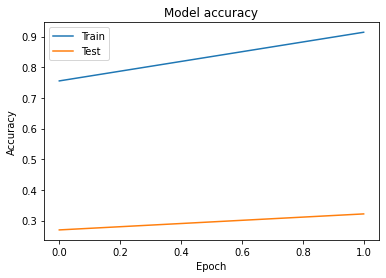

In [19]:
# Plot training & validation accuracy values
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
labels = ['LEFT','CENTER','RIGHT']
def BERT_Predict(review):
  global counter
  tf_batch = tokenizer(review, max_length=128, padding=True, truncation=True, return_tensors='tf')
  tf_outputs = model(tf_batch)
  tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
  label = tf.argmax(tf_predictions, axis=1)
  label = label.numpy() 
  print(counter," >> ", review[:15], ":", labels[label[0]], "\n") 
  counter = counter+1
  return label[0];

In [21]:
counter = 0
test['PRED_LABEL_COLUMN'] = test['DATA_COLUMN'].apply(BERT_Predict)
test

0  >>  Has the media g : RIGHT 

1  >>  Fort Worth ISD  : RIGHT 

2  >>  With Congress h : CENTER 

3  >>  The White House : LEFT 

4  >>  In 2004 , after : LEFT 

5  >>  FILE - In this  : LEFT 

6  >>  Is there a char : CENTER 

7  >>  FILE - In this  : LEFT 

8  >>  In the weeks fo : LEFT 

9  >>  This Sept. 18 , : LEFT 

10  >>  Part two : Trum : LEFT 

11  >>  Officials from  : CENTER 

12  >>  Former New York : RIGHT 

13  >>  After failing t : RIGHT 

14  >>  FILE - In this  : LEFT 

15  >>  This combinatio : LEFT 

16  >>  In this handout : LEFT 

17  >>  ABOVE : Conserv : LEFT 

18  >>  In an interview : LEFT 

19  >>  ( CNN ) – Sen.  : LEFT 

20  >>  Politics is cyc : RIGHT 

21  >>  Eight years lat : LEFT 

22  >>  A photo of the  : LEFT 

23  >>  President Barac : LEFT 

24  >>  After perjuring : LEFT 

25  >>  Dr. R. Shane Da : LEFT 

26  >>  President Trump : RIGHT 

27  >>  On Monday morni : LEFT 

28  >>  By a margin of  : RIGHT 

29  >>  On the morning  : LEFT 

30  >> 

240  >>  I stirred up so : LEFT 

241  >>  MONTGOMERY , Al : LEFT 

242  >>  McLennan County : CENTER 

243  >>  In an interview : LEFT 

244  >>  ( CNN ) - Vice  : LEFT 

245  >>  `` In shutdown  : CENTER 

246  >>  Math is a deepl : LEFT 

247  >>  SAN FRANCISCO ( : RIGHT 

248  >>  The FBI directo : LEFT 

249  >>  Four charged wi : CENTER 

250  >>  LOS ANGELES/CHA : LEFT 

251  >>  The United King : LEFT 

252  >>  Comedians and p : LEFT 

253  >>  Over there at B : LEFT 

254  >>  An Iowa caucus  : RIGHT 

255  >>  FILE - In this  : LEFT 

256  >>  I have returned : RIGHT 

257  >>  In ABC TV inter : CENTER 

258  >>  Hillary Clinton : CENTER 

259  >>  For all the hyp : LEFT 

260  >>  Pressure to clo : LEFT 

261  >>  Trump gives fir : CENTER 

262  >>  President Donal : CENTER 

263  >>  Washington ( CN : LEFT 

264  >>  WASHINGTON – Fo : CENTER 

265  >>  The New York Ti : LEFT 

266  >>  Hillary Clinton : LEFT 

267  >>  ( CNN ) – One d : LEFT 

268  >>  ( CNN ) – Forme : LE

477  >>  There has been  : LEFT 

478  >>  While Supreme C : CENTER 

479  >>  ( ███ ) - The c : LEFT 

480  >>  The House leade : LEFT 

481  >>  Nobody is talki : RIGHT 

482  >>  The New York at : CENTER 

483  >>  Interested in T : CENTER 

484  >>  WASHINGTON ( ██ : LEFT 

485  >>  ALEXANDRIA , Va : LEFT 

486  >>  A full week aft : CENTER 

487  >>  US Attorney Gen : LEFT 

488  >>  In a sweeping s : LEFT 

489  >>  ( CNN ) – Forme : LEFT 

490  >>  FILE - In this  : LEFT 

491  >>  Fair Warning :  : RIGHT 

492  >>  Gay rights wo n : LEFT 

493  >>  The Trump admin : LEFT 

494  >>  Treasury Secret : LEFT 

495  >>  ( CNN ) - The T : LEFT 

496  >>  The assassinati : CENTER 

497  >>  How did Donald  : CENTER 

498  >>  US President Do : LEFT 

499  >>  Rather than str : RIGHT 

500  >>  As Democrats ab : LEFT 

501  >>  Have you ever u : LEFT 

502  >>  Barney Frank ha : LEFT 

503  >>  Last week , Cre : LEFT 

504  >>  In all of the m : RIGHT 

505  >>  Presidential ad : CENTE

714  >>  WASHINGTON ( ██ : LEFT 

715  >>  Wearing pink ,  : LEFT 

716  >>  Trump calls for : CENTER 

717  >>  FBI Director Ja : RIGHT 

718  >>  The Path to Gay : CENTER 

719  >>  WASHINGTON ( ██ : LEFT 

720  >>  ( ███ ) - Two m : LEFT 

721  >>  Republican Sens : RIGHT 

722  >>  House Speaker N : RIGHT 

723  >>  Fox News Channe : LEFT 

724  >>  When Hillary Cl : LEFT 

725  >>  President Barac : CENTER 

726  >>  PROVO , Utah (  : LEFT 

727  >>  As I write this : LEFT 

728  >>  Last week , Att : RIGHT 

729  >>  Washington ( CN : LEFT 

730  >>  Do You Approve  : CENTER 

731  >>  `` All this cra : LEFT 

732  >>  Washington ( CN : LEFT 

733  >>  Lawmakers in We : CENTER 

734  >>  US President Do : LEFT 

735  >>  Team questioned : LEFT 

736  >>  People ticked o : LEFT 

737  >>  ALEXANDRIA , Va : LEFT 

738  >>  Agents who work : LEFT 

739  >>  — The Wonderful : LEFT 

740  >>  Vice President  : RIGHT 

741  >>  Could Republica : RIGHT 

742  >>  Gay and lesbian : CENTE

951  >>  NORFOLK , Va. ( : RIGHT 

952  >>  Statistics from : RIGHT 

953  >>  The FBI says it : RIGHT 

954  >>  Even President  : RIGHT 

955  >>  Fixer says ‘ I  : LEFT 

956  >>  On April 2 in T : LEFT 

957  >>  President Donal : LEFT 

958  >>  On Tuesday , NB : RIGHT 

959  >>  WASHINGTON ( ██ : LEFT 

960  >>  ( CNN ) - When  : LEFT 

961  >>  New York 's att : CENTER 

962  >>  On Wednesday ,  : LEFT 

963  >>  President Trump : CENTER 

964  >>  After firing Ja : RIGHT 

965  >>  When I moved to : CENTER 

966  >>  NEW YORK — John : CENTER 

967  >>  WASHINGTON ( ██ : LEFT 

968  >>  FILE - In this  : RIGHT 

969  >>  March 16 ( UPI  : CENTER 

970  >>  There has been  : LEFT 

971  >>  Virginia Govern : LEFT 

972  >>  The media have  : RIGHT 

973  >>  ISTANBUL ( AP ) : RIGHT 

974  >>  The findings of : CENTER 

975  >>  Fox News anchor : LEFT 

976  >>  Two years ago , : LEFT 

977  >>  The FBI ’ s top : LEFT 

978  >>  WASHINGTON , De : RIGHT 

979  >>  US President Do :

1183  >>  ALEXANDRIA , Va : LEFT 

1184  >>  The US launched : CENTER 

1185  >>  Pope Francis re : CENTER 

1186  >>  President Donal : CENTER 

1187  >>  CHAPEL HILL , N : LEFT 

1188  >>  Pressure is mou : CENTER 

1189  >>  As son of civil : LEFT 

1190  >>  WASHINGTON ( ██ : LEFT 

1191  >>  The Seattle Pol : RIGHT 

1192  >>  WASHINGTON ( ██ : LEFT 

1193  >>  A Chicago judge : LEFT 

1194  >>  FILE - In this  : LEFT 

1195  >>  Policy intellec : RIGHT 

1196  >>  Now that Hurric : RIGHT 

1197  >>  A key player in : LEFT 

1198  >>  Hundreds of tho : CENTER 

1199  >>  For Joe Biden , : LEFT 

1200  >>  Fox News filed  : LEFT 

1201  >>  Washington ( CN : LEFT 

1202  >>  President Barac : LEFT 

1203  >>  Donald Trump 's : LEFT 

1204  >>  Seven years ago : LEFT 

1205  >>  The real unempl : LEFT 

1206  >>  British Prime M : RIGHT 

1207  >>  In 2010 , an ag : LEFT 

1208  >>  US President Do : LEFT 

1209  >>  The lawyers for : LEFT 

1210  >>  An armed office : LEFT 

1211  

,DATA_COLUMN,LABEL_COLUMN,PRED_LABEL_COLUMN
0,Has the media gotten worse ? Or am I just grou...,2,2
1,Fort Worth ISD employee Yolanda Cintron assist...,1,2
2,With Congress heading toward another governmen...,0,1
3,The White House Commission on Combating Drug A...,0,0
4,"In 2004 , after the open secularism of John Ke...",2,0
...,...,...,...
1295,The very big news of the day : FBI agents raid...,2,0
1296,WASHINGTON ( ███ ) - President Donald Trump on...,1,0
1297,US President Donald Trump has accused Attorney...,1,0
1298,"‘ Donald is right , ’ says Russian president ,...",0,1


In [22]:
test[test['LABEL_COLUMN'] != test['PRED_LABEL_COLUMN']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822 entries, 1 to 1299
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DATA_COLUMN        822 non-null    object
 1   LABEL_COLUMN       822 non-null    int64 
 2   PRED_LABEL_COLUMN  822 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 25.7+ KB


In [23]:
def PlotChart(df):
  #Get the matrices/statistics 
  x=df['LABEL_COLUMN'].value_counts()
  x=x.sort_index()
  print(x)

  # Pie chart, shows the % of the stars on the reviews:
  labels = x.index
  sizes = x.values*100/ x.values.sum()
  #explode = (0.05, 0.02, 0.04, 0.05) 

  plt.figure(figsize=(10,6))
  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
          shadow=True, startangle=90)
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

  plt.title("Model Train Dataset: Proportion of the Categories in the dataset")
  plt.show()

In [25]:
!pip install scikit-learn

  Using cached scikit_learn-0.24.2-cp37-cp37m-win_amd64.whl (6.8 MB)
  Using cached threadpoolctl-2.2.0-py3-none-any.whl (12 kB)


You should consider upgrading via the 'C:\Users\mrahman31\Anaconda3\envs\tfenv\python.exe -m pip install --upgrade pip' command.


0     8861
1     7488
2    10241
Name: LABEL_COLUMN, dtype: int64


<Figure size 720x432 with 0 Axes>

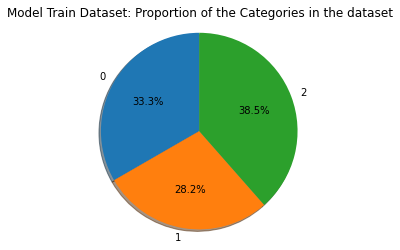

              precision    recall  f1-score   support

           0       0.35      0.65      0.46       402
           1       0.11      0.11      0.11       299
           2       0.67      0.31      0.43       599

    accuracy                           0.37      1300
   macro avg       0.38      0.35      0.33      1300
weighted avg       0.45      0.37      0.36      1300



In [26]:
from sklearn.metrics import  classification_report

PlotChart(train)
print(classification_report(test['LABEL_COLUMN'], test['PRED_LABEL_COLUMN']))